In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/content/data.csv')
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0,0,0
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0,0,0
2,2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0,0,0
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0,0,4
4,4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0,0,1


In [3]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0,0,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0,0,0
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0,0,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0,0,4
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0,0,1


In [4]:
X=data[['Pclass','Sex','Age','Fare','Embarked','Title','FamilySize']]
y=data.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [5]:
Dtree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth = 2,random_state = 0)  
Dtree.fit(X_train, y_train)   
y_pred = Dtree.predict(X_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8026905829596412


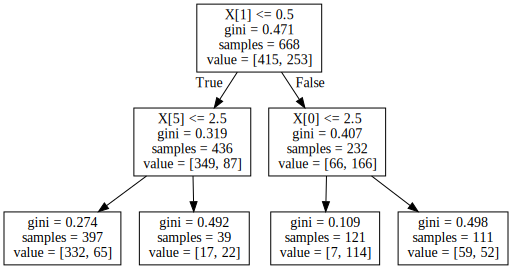

In [6]:
dot_data = tree.export_graphviz(Dtree, out_file=None)
graph = graphviz.Source(dot_data) 
graph 

we can see that the root node(Sex feature) starts with 668 passengers,253 of them have survived and with a gini index=0.471 . this results in two nodes: 

1.   the first intermidiate node(true branch from the root node: if the passenger is a male) which represent the Title feature has a gini of 0.319 and it will be divided also into 2 leaf nodes, one with gini of 0.274 if the Title of the male passenger is less or equal to 2 which means the male passenger is not rich and the other one with gini of 0.492
2.   the second intermidiate node(False branch from the root node: if the passenger is a female) which represent the Pclass feature has a gini of 0.407 and it is divided also to 2 leaf nodes:

*   the first one( true branch:the female passenger is from first or second class)is with gini of  0.109 which is the lowest value of gini in all the tree. this node has the biggest number of survived passengers (114)

*   the second one (false branch : the female passenger is from third class)is with gini of 0.498






In [7]:
Dtree2 = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth = 5, random_state = 0)  
Dtree2.fit(X_train, y_train)   
y_pred = Dtree2.predict(X_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8295964125560538


when we changed the parameter criterion,wich measures the quality of split, from gini to entropy and the value of max_depth from 2 to 5 the value of accuracy has increased slightly.

In [8]:
clf=RandomForestClassifier()  
clf.fit(X_train, y_train)  
y_pred=clf.predict(X_test)  
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8340807174887892


In [9]:
clf2=RandomForestClassifier(n_estimators=25)  
clf2.fit(X_train, y_train)  
y_pred=clf2.predict(X_test)  
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7937219730941704


The value of the accuracy has decreased when we changed the number of estimators.So it's important to choose the best value of the number of trees in random forest in order to have the best accuracy.